## Imported all the necsseary libaries and modules

In [11]:
import pandas
import PIL
import os
import numpy as np
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from IPython.display import display, Image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Dataset is already divided into test and train, below is the summary of the dataset

In [2]:
root_dir = "../ASL_Dataset"

In [13]:
# Initialize dictionaries to hold the counts
counts = {
    'Train': {},
    'Test': {}
}

# Function to count images in each subdirectory
def count_images_in_directory(directory):
    label_counts = {}
    total_count = 0
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):
            image_count = len([file for file in os.listdir(label_dir) if os.path.isfile(os.path.join(label_dir, file))])
            label_counts[label] = image_count
            total_count += image_count
    return label_counts, total_count

# Count images in train, test, and validation directories
for folder in ['Train', 'Test']:
    folder_path = os.path.join(root_dir, folder)
    counts[folder]['label_counts'], counts[folder]['total_count'] = count_images_in_directory(folder_path)

# Print the results
for folder in ['Train', 'Test']:
    print(f"Folder: {folder}")
    print(f"Total images: {counts[folder]['total_count']}")
    print("Images per label:")
    for label, count in counts[folder]['label_counts'].items():
        print(f"  {label}: {count}")
    print()

Folder: Train
Total images: 165670
Images per label:
  N: 5996
  R: 5966
  Space: 5886
  B: 5996
  I: 5996
  F: 5996
  H: 5996
  E: 5996
  U: 4542
  M: 5996
  X: 5996
  K: 5996
  Q: 5996
  Y: 5720
  S: 5996
  G: 5996
  A: 5996
  O: 5996
  T: 5648
  V: 5996
  Z: 5996
  C: 5996
  P: 5996
  L: 5996
  W: 5996
  D: 5996
  Nothing: 5996
  J: 5996

Folder: Test
Total images: 112
Images per label:
  N: 4
  R: 4
  Space: 4
  B: 4
  I: 4
  F: 4
  H: 4
  E: 4
  U: 4
  M: 4
  X: 4
  K: 4
  Q: 4
  Y: 4
  S: 4
  G: 4
  A: 4
  O: 4
  T: 4
  V: 4
  Z: 4
  C: 4
  P: 4
  L: 4
  W: 4
  D: 4
  Nothing: 4
  J: 4



## Labels
The dataset includes the following labels in alphabetical order:

A, B, C, D, E, F, G, H, I, J, K, L, M, N, Nothing, O, P, Q, R, S, Space, T, U, V, W, X, Y, Z

## Dataset Summary¶
### Folder: train
- Total images: 165670
- Images per label: 5996 each

### Folder: test
- Total images: 112
- Images per label: 4 each

## Sample images from each label

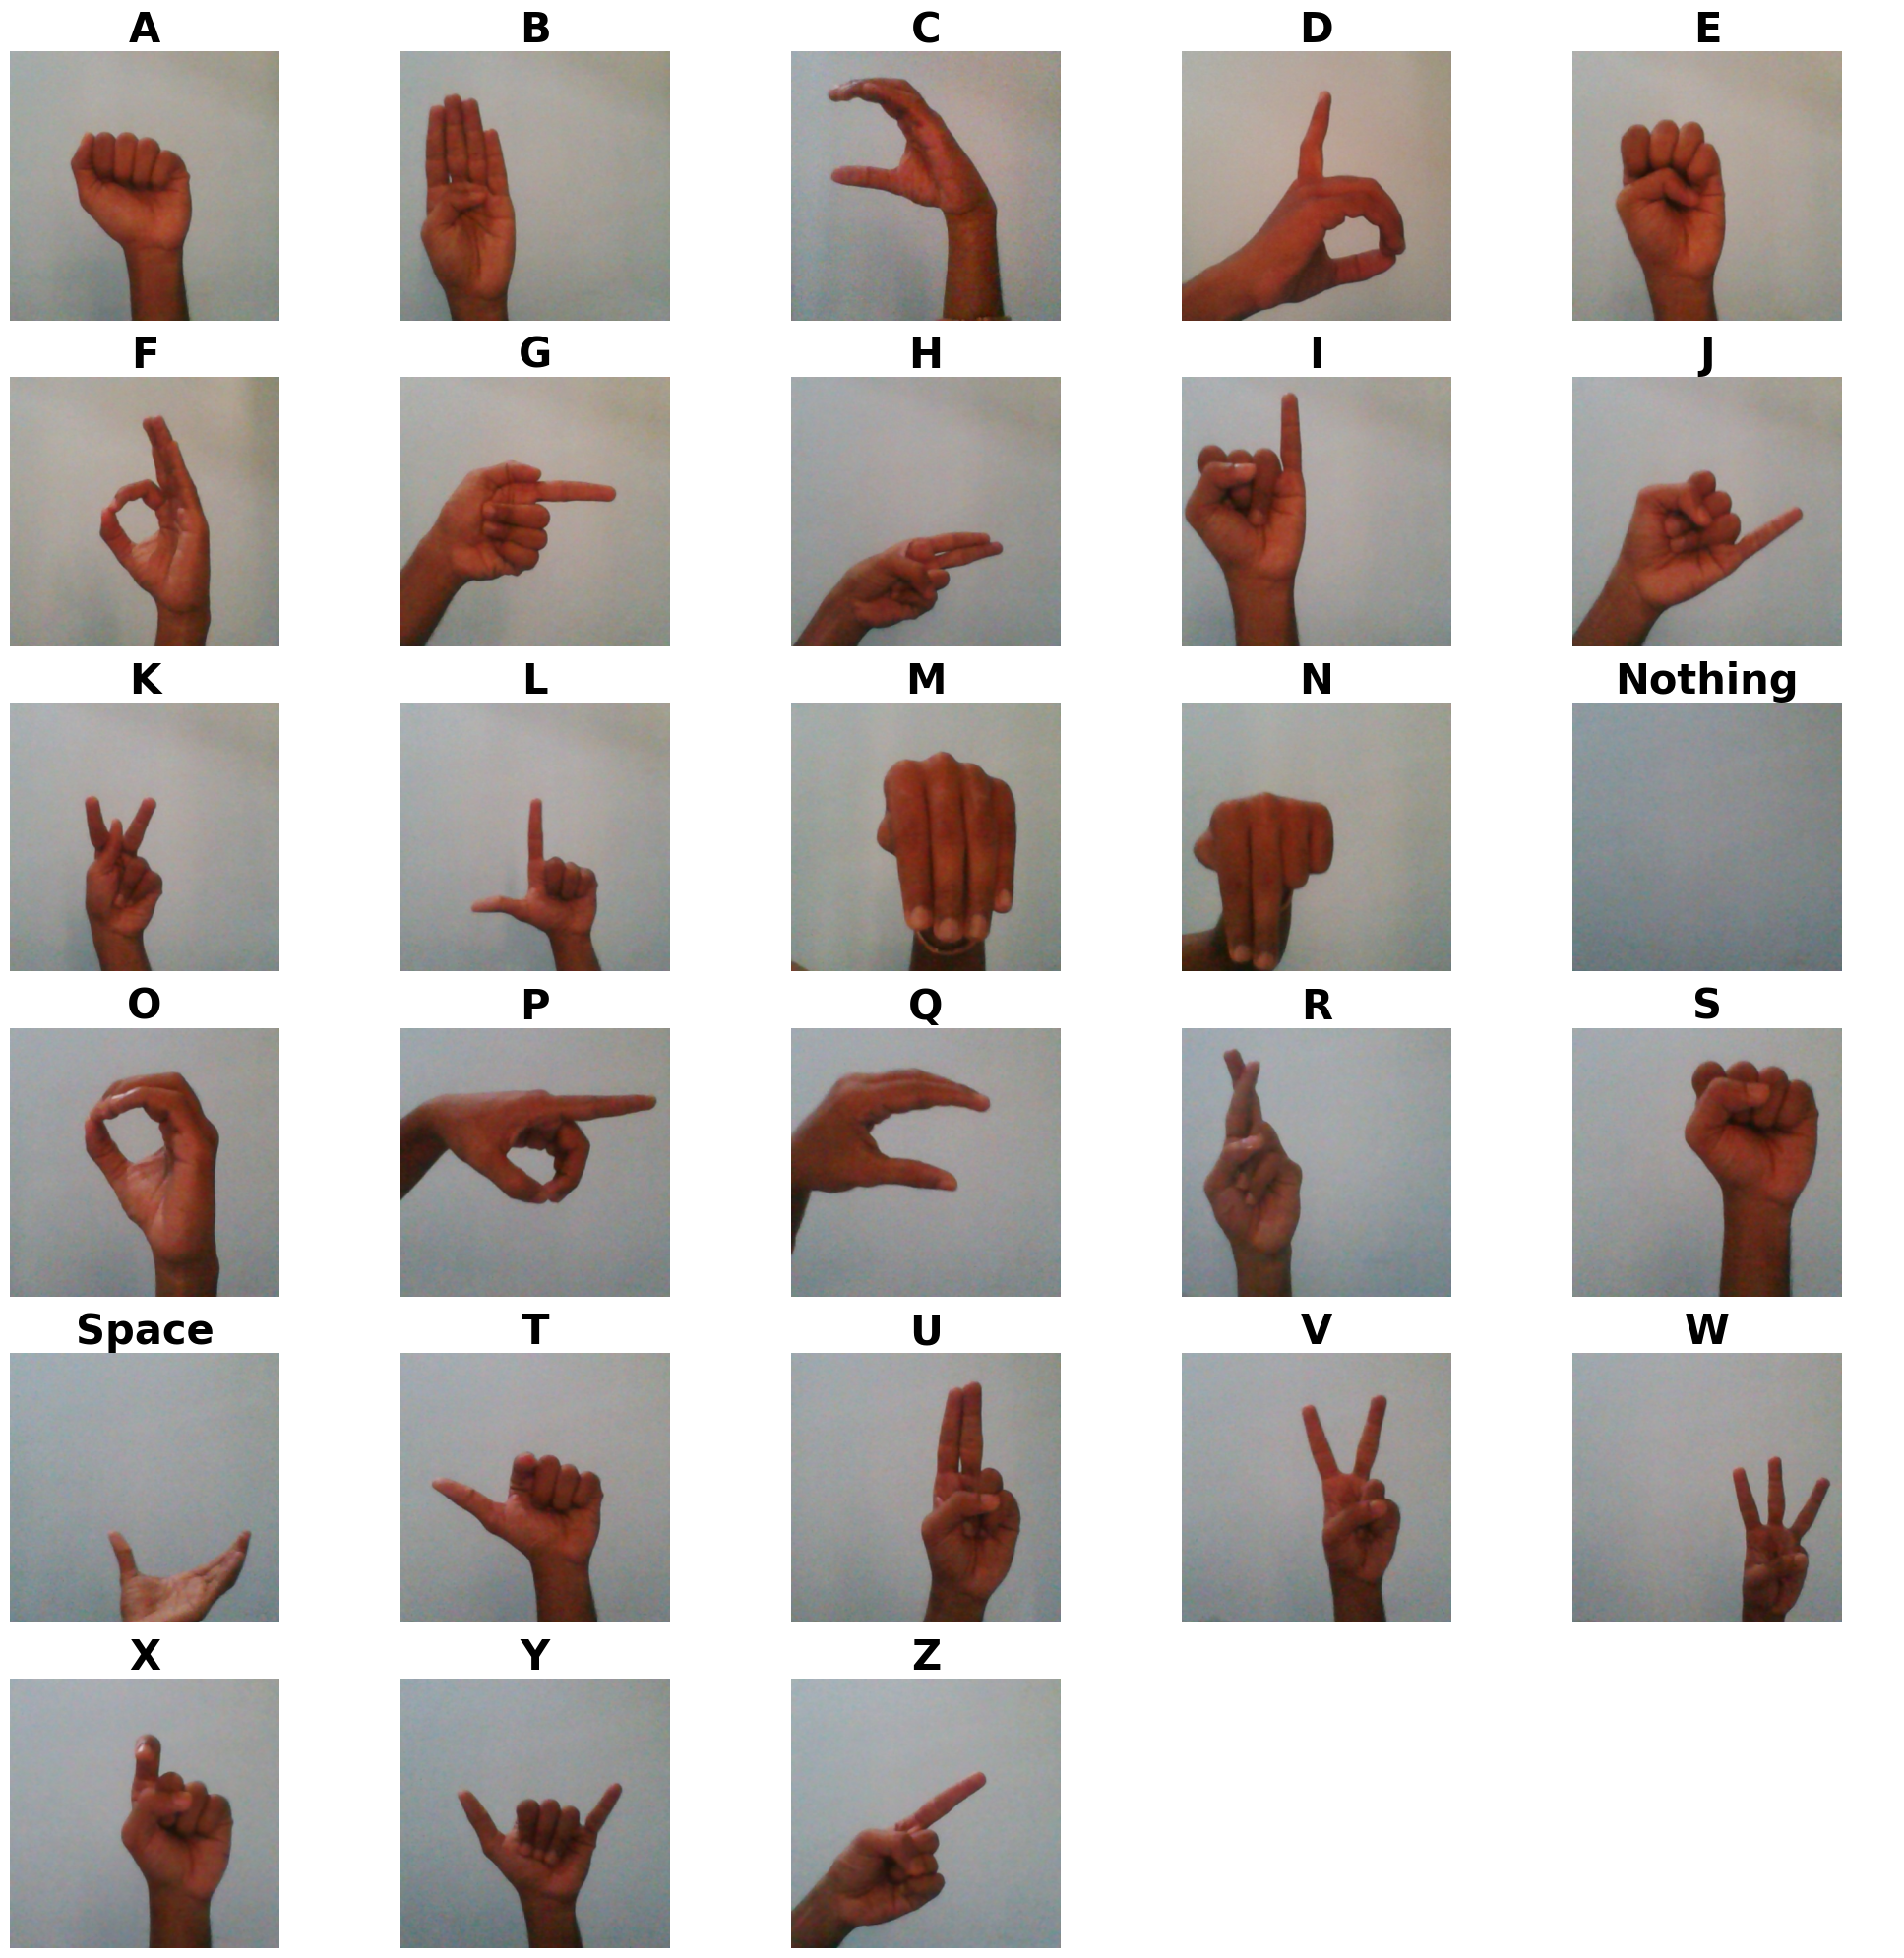

In [14]:
train_dir = os.path.join(root_dir, "Train")

# Get the list of labels (subdirectories in the train directory)
labels = sorted(os.listdir(train_dir))

# Set up the plot
fig, axes = plt.subplots(nrows=len(labels)//5 + 1, ncols=5, figsize=(20, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each label and plot one image per label
for ax, label in zip(axes, labels):
    # Get the path to the label directory
    label_dir = os.path.join(train_dir, label)
    
    # Get the list of image files in the label directory
    image_files = os.listdir(label_dir)
    
    # Select the first image file
    image_path = os.path.join(label_dir, image_files[0])
    
    # Load and plot the image
    image = mpimg.imread(image_path)
    ax.imshow(image)
    ax.set_title(label,fontsize=30,fontweight='bold')
    ax.axis('off')

# Hide any remaining empty subplots
for ax in axes[len(labels):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Model Definition
- Using ResNet50V2 and changing the final layer to a softmax classification layer with 28 classes (26 alphabets , Nothing , Space)

In [15]:
base_model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # Add a fully connected layer
predictions = Dense(28, activation='softmax')(x)  # 28 classes for the dataset

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_conv[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │        256 │ pool1_pool[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_preac… │ (None, 56, 56,    │          0 │ conv2_block1_pre… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,096 │ conv2_block1_pre… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_pad  │ (None, 58, 58,    │          0 │ conv2_block1_1_r… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_2_p… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_pre… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_out    │ (None, 56, 56,    │          0 │ conv2_block1_0_c

 Total params: 25,691,676 (98.01 MB)

 Trainable params: 25,646,236 (97.83 MB)

 Non-trainable params: 45,440 (177.50 KB)

## Training code

In [16]:
train_dir = os.path.join(root_dir, "Train")

train_datagen = ImageDataGenerator()

batch_size = 32

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='sparse')

model.fit(train_generator, epochs=1)


Found 165670 images belonging to 28 classes.
5178/5178 ━━━━━━━━━━━━━━━━━━━━ 794s 142ms/step - accuracy: 0.9867 - loss: 0.0625


## Why 1 Epoch

This project involves training a deep learning model to recognize American Sign Language (ASL) signs using a dataset of images across 28 labels, each containing 6000 images. Due to the repetitive nature of the dataset and the inclusion of augmented versions of the same images, training the model for just one epoch is sufficient. The redundancy ensures that the model is exposed to similar patterns multiple times within a single epoch, leading to efficient learning and quick generalization to recognize the ASL signs accurately.


## Saving the model

In [17]:
model.save('American_Sign_Language_ResNet50V2.h5')

## Testing the model

In [18]:
test_dir = os.path.join(root_dir, "Test")
test_datagen = ImageDataGenerator()

# Set batch size
batch_size = 32

# Create the test data generator
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='sparse')

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)

print("Test loss:", loss)
print("Test accuracy:", accuracy)

Found 112 images belonging to 28 classes.
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 1.0000 - loss: 2.4392e-06 
Test loss: 2.1042201296950225e-06
Test accuracy: 1.0
